In [1]:
from __future__ import division
%pylab --no-import-all
%matplotlib inline
import pandas as pd
import numpy as np



Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)
    

In [3]:
try:
    maddison_new = pd.read_stata(pathout + 'Maddison2018.dta')
    maddison_new_region = pd.read_stata(pathout + 'Maddison2018_region.dta')
    maddison_new_1990 = pd.read_stata(pathout + 'Maddison2018_1990.dta')
except:
    maddison_new = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta')
    maddison_new.to_stata(pathout + 'Maddison2018.dta', write_index=False, version=117)
    maddison_new_region = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.dta')
    maddison_new_region.to_stata(pathout + 'Maddison2018_region.dta', write_index=False, version=117)
    maddison_new_1990 = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_1990bm.dta')
    maddison_new_1990.to_stata(pathout + 'Maddison2018_1990.dta', write_index=False, version=117)
    

In [4]:
maddison_new.head



<bound method NDFrame.head of       countrycode      country    year  cgdppc  rgdpnapc      pop  \
0             AFG  Afghanistan  1820.0     NaN       NaN   3280.0   
1             AFG  Afghanistan  1870.0     NaN       NaN   4207.0   
2             AFG  Afghanistan  1913.0     NaN       NaN   5730.0   
3             AFG  Afghanistan  1950.0  2392.0    2392.0   8150.0   
4             AFG  Afghanistan  1951.0  2422.0    2422.0   8284.0   
...           ...          ...     ...     ...       ...      ...   
19868         ZWE     Zimbabwe  2012.0  1623.0    1604.0  12620.0   
19869         ZWE     Zimbabwe  2013.0  1801.0    1604.0  13183.0   
19870         ZWE     Zimbabwe  2014.0  1797.0    1594.0  13772.0   
19871         ZWE     Zimbabwe  2015.0  1759.0    1560.0  14230.0   
19872         ZWE     Zimbabwe  2016.0  1729.0    1534.0  14547.0   

              i_cig i_bm  
0               NaN  NaN  
1               NaN  NaN  
2               NaN  NaN  
3      Extrapolated  NaN  
4     

In [5]:
maddison_new['year'] = maddison_new.year.astype(int)
maddison_new

,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
0,AFG,Afghanistan,1820,NaN,NaN,3280.0,NaN,NaN
1,AFG,Afghanistan,1870,NaN,NaN,4207.0,NaN,NaN
2,AFG,Afghanistan,1913,NaN,NaN,5730.0,NaN,NaN
3,AFG,Afghanistan,1950,2392.0,2392.0,8150.0,Extrapolated,NaN
4,AFG,Afghanistan,1951,2422.0,2422.0,8284.0,Extrapolated,NaN
...,...,...,...,...,...,...,...,...
19868,ZWE,Zimbabwe,2012,1623.0,1604.0,12620.0,Extrapolated,NaN
19869,ZWE,Zimbabwe,2013,1801.0,1604.0,13183.0,Extrapolated,NaN
19870,ZWE,Zimbabwe,2014,1797.0,1594.0,13772.0,Extrapolated,NaN
19871,ZWE,Zimbabwe,2015,1759.0,1560.0,14230.0,Extrapolated,NaN


In [6]:
if not os.path.exists(pathout + 'Maddison_original.xls'):
    import urllib
    dataurl = "http://www.ggdc.net/maddison/Historical_Statistics/horizontal-file_02-2010.xls"
    urllib.request.urlretrieve(dataurl, pathout + 'Maddison_original.xls')
    

In [7]:
maddison_old_pop = pd.read_excel(pathout + 'Maddison_original.xls', sheet_name="Population", skiprows=2)
maddison_old_pop


,Unnamed: 0,1,Unnamed: 2,1000,Unnamed: 4,1500,Unnamed: 6,1600,Unnamed: 8,1700,...,2002,2003,2004,2005,2006,2007,2008,2009,Unnamed: 201,2030
0,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,500.0,NaN,700.0,NaN,2000.0,NaN,2500.0,NaN,2500.0,...,8148.312,8162.656,8174.762,8184.691,8192.880,8199.783,8205.533,8210,NaN,8120.000
2,Belgium,300.0,NaN,400.0,NaN,1400.0,NaN,1600.0,NaN,2000.0,...,10311.970,10330.824,10348.276,10364.388,10379.067,10392.226,10403.951,10414,NaN,10409.000
3,Denmark,180.0,NaN,360.0,NaN,600.0,NaN,650.0,NaN,700.0,...,5374.693,5394.138,5413.392,5432.335,5450.661,5468.120,5484.723,5501,NaN,5730.488
4,Finland,20.0,NaN,40.0,NaN,300.0,NaN,400.0,NaN,400.0,...,5193.039,5204.405,5214.512,5223.442,5231.372,5238.460,5244.749,5250,NaN,5201.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Guadeloupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,435.739,440.189,444.515,448.713,452.776,456.698,460.486,n.a.,NaN,523.493
274,Guyana (Fr.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,182.333,186.917,191.309,195.506,199.509,203.321,206.941,n.a.,NaN,272.781
275,Martinique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,422.277,425.966,429.510,432.900,436.131,439.202,442.119,n.a.,NaN,486.714
276,Reunion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,743.981,755.171,766.153,776.948,787.584,798.094,808.506,n.a.,NaN,1025.217


In [8]:
maddison_old_pop.rename(columns={'Unnamed: 0':'Country'}, inplace=True)


In [9]:
maddison_old_pop = maddison_old_pop[[col for col in maddison_old_pop.columns if str(col).startswith('Unnamed')==False]]


In [10]:
maddison_old_pop

,Country,1,1000,1500,1600,1700,1820,1821,1822,1823,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2030
0,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,500.0,700.0,2000.0,2500.0,2500.0,3369.0,3386.0,3402.0,3419.0,...,8131.690,8148.312,8162.656,8174.762,8184.691,8192.880,8199.783,8205.533,8210,8120.000
2,Belgium,300.0,400.0,1400.0,1600.0,2000.0,3434.0,3464.0,3495.0,3526.0,...,10291.679,10311.970,10330.824,10348.276,10364.388,10379.067,10392.226,10403.951,10414,10409.000
3,Denmark,180.0,360.0,600.0,650.0,700.0,1155.0,1167.0,1179.0,1196.0,...,5355.826,5374.693,5394.138,5413.392,5432.335,5450.661,5468.120,5484.723,5501,5730.488
4,Finland,20.0,40.0,300.0,400.0,400.0,1169.0,1186.0,1202.0,1219.0,...,5180.309,5193.039,5204.405,5214.512,5223.442,5231.372,5238.460,5244.749,5250,5201.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Guadeloupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,431.170,435.739,440.189,444.515,448.713,452.776,456.698,460.486,n.a.,523.493
274,Guyana (Fr.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,177.562,182.333,186.917,191.309,195.506,199.509,203.321,206.941,n.a.,272.781
275,Martinique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,418.454,422.277,425.966,429.510,432.900,436.131,439.202,442.119,n.a.,486.714
276,Reunion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,732.570,743.981,755.171,766.153,776.948,787.584,798.094,808.506,n.a.,1025.217


In [11]:
maddison_old_pop.columns = ['Country'] + ['pop_'+str(col) for col in maddison_old_pop.columns[1:]]
maddison_old_pop


,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1821,pop_1822,pop_1823,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
0,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,500.0,700.0,2000.0,2500.0,2500.0,3369.0,3386.0,3402.0,3419.0,...,8131.690,8148.312,8162.656,8174.762,8184.691,8192.880,8199.783,8205.533,8210,8120.000
2,Belgium,300.0,400.0,1400.0,1600.0,2000.0,3434.0,3464.0,3495.0,3526.0,...,10291.679,10311.970,10330.824,10348.276,10364.388,10379.067,10392.226,10403.951,10414,10409.000
3,Denmark,180.0,360.0,600.0,650.0,700.0,1155.0,1167.0,1179.0,1196.0,...,5355.826,5374.693,5394.138,5413.392,5432.335,5450.661,5468.120,5484.723,5501,5730.488
4,Finland,20.0,40.0,300.0,400.0,400.0,1169.0,1186.0,1202.0,1219.0,...,5180.309,5193.039,5204.405,5214.512,5223.442,5231.372,5238.460,5244.749,5250,5201.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Guadeloupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,431.170,435.739,440.189,444.515,448.713,452.776,456.698,460.486,n.a.,523.493
274,Guyana (Fr.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,177.562,182.333,186.917,191.309,195.506,199.509,203.321,206.941,n.a.,272.781
275,Martinique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,418.454,422.277,425.966,429.510,432.900,436.131,439.202,442.119,n.a.,486.714
276,Reunion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,732.570,743.981,755.171,766.153,776.948,787.584,798.094,808.506,n.a.,1025.217


In [12]:
pop = maddison_old_pop.loc[maddison_old_pop.Country.apply(lambda x: str(x).upper().find('TOTAL')!=-1)].reset_index(drop=True)

pop

,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1821,pop_1822,pop_1823,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
0,Total 12 Western Europe,18600.0,19700.0,48192.0,62580.0,68796.0,1.145590e+05,115725.0,116887.0,118055.0,...,3.270711e+05,3.280213e+05,3.289113e+05,3.297674e+05,330584.638,3.313552e+05,3.320898e+05,3.327720e+05,333405,337677.022
1,Total 14 small west European countries,300.0,260.0,276.0,358.0,394.0,6.570000e+02,665.0,672.0,678.0,...,2.399679e+03,2.418612e+03,2.439111e+03,2.460670e+03,2479.935,2.498000e+03,2.516299e+03,2.533957e+03,2840,2810.588
2,Total 30 Western Europe,25050.0,25560.0,57268.0,73778.0,81460.0,1.330280e+05,134323.0,135615.0,136912.0,...,3.943612e+05,3.955093e+05,3.965978e+05,3.976500e+05,398656.277,3.996072e+05,4.005125e+05,4.013529e+05,402418,405751.702
3,Total Western Offshoots,1120.0,1870.0,2800.0,2300.0,1750.0,1.123051e+04,NaN,NaN,NaN,...,3.394240e+05,3.423850e+05,3.456020e+05,3.489440e+05,352249.000,3.556780e+05,3.585480e+05,3.626210e+05,366175,443038.000
4,Total 7 East European Countries,4750.0,6500.0,13500.0,16950.0,18800.0,3.645700e+04,NaN,NaN,NaN,...,1.206569e+05,1.206393e+05,1.206074e+05,1.205819e+05,120531.758,1.204637e+05,1.203780e+05,1.202745e+05,120154,113554.887
5,Total Former USSR,3900.0,7100.0,16950.0,20700.0,26550.0,5.476500e+04,NaN,NaN,NaN,...,2.879803e+05,2.871891e+05,2.864091e+05,2.857133e+05,285131.177,2.845990e+05,2.841199e+05,2.836851e+05,283290,271581.386
6,Total 8 Latin American countries,NaN,NaN,NaN,NaN,NaN,1.569545e+04,NaN,NaN,NaN,...,4.273040e+05,4.329879e+05,4.386951e+05,4.444566e+05,450216.903,4.559425e+05,4.616469e+05,4.673224e+05,471000,575671.155
7,Total 15 Latin American countries,NaN,NaN,NaN,NaN,NaN,5.096000e+03,NaN,NaN,NaN,...,9.775434e+04,9.936699e+04,1.010348e+05,1.017465e+05,104485.201,1.062087e+05,1.078933e+05,1.095795e+05,109647,145074.205
8,Total 21 small Caribbean countries,NaN,NaN,NaN,NaN,NaN,8.000000e+02,NaN,NaN,NaN,...,3.133154e+03,3.160664e+03,3.187034e+03,3.213897e+03,3239.267,3.264764e+03,3.289819e+03,3.315352e+03,3344,3719.480
9,Total Latin America,5600.0,11400.0,17500.0,8600.0,12050.0,2.159145e+04,NaN,NaN,NaN,...,5.281915e+05,5.355156e+05,5.429169e+05,5.494170e+05,557941.371,5.654160e+05,5.728300e+05,5.802172e+05,583991,724464.840


In [13]:
pop = pop.dropna(subset=['pop_1'])
pop = pop.loc[2:]
pop

,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1821,pop_1822,pop_1823,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
2,Total 30 Western Europe,25050.0,25560.0,57268.0,73778.0,81460.0,1.330280e+05,134323.0,135615.0,136912.0,...,3.943612e+05,3.955093e+05,3.965978e+05,3.976500e+05,398656.277,3.996072e+05,4.005125e+05,4.013529e+05,402418,405751.702
3,Total Western Offshoots,1120.0,1870.0,2800.0,2300.0,1750.0,1.123051e+04,NaN,NaN,NaN,...,3.394240e+05,3.423850e+05,3.456020e+05,3.489440e+05,352249.000,3.556780e+05,3.585480e+05,3.626210e+05,366175,443038.000
4,Total 7 East European Countries,4750.0,6500.0,13500.0,16950.0,18800.0,3.645700e+04,NaN,NaN,NaN,...,1.206569e+05,1.206393e+05,1.206074e+05,1.205819e+05,120531.758,1.204637e+05,1.203780e+05,1.202745e+05,120154,113554.887
5,Total Former USSR,3900.0,7100.0,16950.0,20700.0,26550.0,5.476500e+04,NaN,NaN,NaN,...,2.879803e+05,2.871891e+05,2.864091e+05,2.857133e+05,285131.177,2.845990e+05,2.841199e+05,2.836851e+05,283290,271581.386
9,Total Latin America,5600.0,11400.0,17500.0,8600.0,12050.0,2.159145e+04,NaN,NaN,NaN,...,5.281915e+05,5.355156e+05,5.429169e+05,5.494170e+05,557941.371,5.654160e+05,5.728300e+05,5.802172e+05,583991,724464.840
13,Total 15 West Asian countries,19400.0,20000.0,17800.0,21400.0,20800.0,2.514700e+04,NaN,NaN,NaN,...,2.417886e+05,2.462562e+05,2.506149e+05,2.552964e+05,260078.152,2.647197e+05,2.694505e+05,2.742858e+05,279067,393792.072
14,Total Asia,168400.0,182600.0,283800.0,378500.0,401800.0,7.104000e+05,NaN,NaN,NaN,...,3.653696e+06,3.700181e+06,3.746026e+06,3.781524e+06,3837845.758,3.882964e+06,3.927514e+06,3.972154e+06,4017611,4916929.556
16,Total Africa,17000.0,32300.0,46610.0,55320.0,61080.0,7.423600e+04,NaN,NaN,NaN,...,8.304815e+05,8.502847e+05,8.702049e+05,8.902262e+05,910631.214,9.314865e+05,9.527871e+05,9.745277e+05,990447,1517429.536
17,World Total,225820.0,267330.0,438428.0,556148.0,603490.0,1.041708e+06,NaN,NaN,NaN,...,6.154791e+06,6.231704e+06,6.308364e+06,6.374056e+06,6462986.555,6.540214e+06,6.616689e+06,6.694832e+06,6764086,8392749.907


In [14]:
pop['Country'] = pop.Country.str.replace('Total', '').str.replace('Countries', '').str.replace('\d+', '').str.replace('European', 'Europe').str.strip()
pop = pop.loc[pop.Country.apply(lambda x: x.find('USSR')==-1 and  x.find('West Asian')==-1)].reset_index(drop=True)
pop

,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1821,pop_1822,pop_1823,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
0,Western Europe,25050.0,25560.0,57268.0,73778.0,81460.0,1.330280e+05,134323.0,135615.0,136912.0,...,3.943612e+05,3.955093e+05,3.965978e+05,3.976500e+05,398656.277,3.996072e+05,4.005125e+05,4.013529e+05,402418,405751.702
1,Western Offshoots,1120.0,1870.0,2800.0,2300.0,1750.0,1.123051e+04,NaN,NaN,NaN,...,3.394240e+05,3.423850e+05,3.456020e+05,3.489440e+05,352249.000,3.556780e+05,3.585480e+05,3.626210e+05,366175,443038.000
2,East Europe,4750.0,6500.0,13500.0,16950.0,18800.0,3.645700e+04,NaN,NaN,NaN,...,1.206569e+05,1.206393e+05,1.206074e+05,1.205819e+05,120531.758,1.204637e+05,1.203780e+05,1.202745e+05,120154,113554.887
3,Latin America,5600.0,11400.0,17500.0,8600.0,12050.0,2.159145e+04,NaN,NaN,NaN,...,5.281915e+05,5.355156e+05,5.429169e+05,5.494170e+05,557941.371,5.654160e+05,5.728300e+05,5.802172e+05,583991,724464.840
4,Asia,168400.0,182600.0,283800.0,378500.0,401800.0,7.104000e+05,NaN,NaN,NaN,...,3.653696e+06,3.700181e+06,3.746026e+06,3.781524e+06,3837845.758,3.882964e+06,3.927514e+06,3.972154e+06,4017611,4916929.556
5,Africa,17000.0,32300.0,46610.0,55320.0,61080.0,7.423600e+04,NaN,NaN,NaN,...,8.304815e+05,8.502847e+05,8.702049e+05,8.902262e+05,910631.214,9.314865e+05,9.527871e+05,9.745277e+05,990447,1517429.536
6,World,225820.0,267330.0,438428.0,556148.0,603490.0,1.041708e+06,NaN,NaN,NaN,...,6.154791e+06,6.231704e+06,6.308364e+06,6.374056e+06,6462986.555,6.540214e+06,6.616689e+06,6.694832e+06,6764086,8392749.907


In [15]:
pop = pop.dropna(axis=1, how='any')
pop

,Country,pop_1,pop_1000,pop_1500,pop_1600,pop_1700,pop_1820,pop_1870,pop_1900,pop_1913,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2030
0,Western Europe,25050.0,25560.0,57268.0,73778.0,81460.0,1.330280e+05,1.874990e+05,233645.000,2.609750e+05,...,3.943612e+05,3.955093e+05,3.965978e+05,3.976500e+05,398656.277,3.996072e+05,4.005125e+05,4.013529e+05,402418,405751.702
1,Western Offshoots,1120.0,1870.0,2800.0,2300.0,1750.0,1.123051e+04,4.608763e+04,86396.000,1.114010e+05,...,3.394240e+05,3.423850e+05,3.456020e+05,3.489440e+05,352249.000,3.556780e+05,3.585480e+05,3.626210e+05,366175,443038.000
2,East Europe,4750.0,6500.0,13500.0,16950.0,18800.0,3.645700e+04,5.355700e+04,70993.000,7.953000e+04,...,1.206569e+05,1.206393e+05,1.206074e+05,1.205819e+05,120531.758,1.204637e+05,1.203780e+05,1.202745e+05,120154,113554.887
3,Latin America,5600.0,11400.0,17500.0,8600.0,12050.0,2.159145e+04,4.040057e+04,64605.986,8.083064e+04,...,5.281915e+05,5.355156e+05,5.429169e+05,5.494170e+05,557941.371,5.654160e+05,5.728300e+05,5.802172e+05,583991,724464.840
4,Asia,168400.0,182600.0,283800.0,378500.0,401800.0,7.104000e+05,7.690499e+05,873324.000,9.792991e+05,...,3.653696e+06,3.700181e+06,3.746026e+06,3.781524e+06,3837845.758,3.882964e+06,3.927514e+06,3.972154e+06,4017611,4916929.556
5,Africa,17000.0,32300.0,46610.0,55320.0,61080.0,7.423600e+04,9.046600e+04,110000.000,1.246970e+05,...,8.304815e+05,8.502847e+05,8.702049e+05,8.902262e+05,910631.214,9.314865e+05,9.527871e+05,9.745277e+05,990447,1517429.536
6,World,225820.0,267330.0,438428.0,556148.0,603490.0,1.041708e+06,1.275732e+06,1563463.986,1.792925e+06,...,6.154791e+06,6.231704e+06,6.308364e+06,6.374056e+06,6462986.555,6.540214e+06,6.616689e+06,6.694832e+06,6764086,8392749.907


In [16]:
pop = pd.wide_to_long(pop, ['pop_'], i='Country', j='year').reset_index()
pop


,Country,year,pop_
0,Western Europe,1,25050
1,Western Offshoots,1,1120
2,East Europe,1,4750
3,Latin America,1,5600
4,Asia,1,168400
...,...,...,...
499,East Europe,2030,113555
500,Latin America,2030,724465
501,Asia,2030,4.91693e+06
502,Africa,2030,1.51743e+06


In [17]:
pop2 = pop.pivot_table(index='year',columns='Country',values='pop_',aggfunc='sum')
pop2

Country,Africa,Asia,East Europe,Latin America,Western Europe,Western Offshoots,World
year,,,,,,,
1,17000.000,1.684000e+05,4750.000,5600.000,25050.000,1120.0,2.258200e+05
1000,32300.000,1.826000e+05,6500.000,11400.000,25560.000,1870.0,2.673300e+05
1500,46610.000,2.838000e+05,13500.000,17500.000,57268.000,2800.0,4.384280e+05
1600,55320.000,3.785000e+05,16950.000,8600.000,73778.000,2300.0,5.561480e+05
1700,61080.000,4.018000e+05,18800.000,12050.000,81460.000,1750.0,6.034900e+05
...,...,...,...,...,...,...,...
2006,931486.521,3.882964e+06,120463.680,565415.973,399607.161,355678.0,6.540214e+06
2007,952787.083,3.927514e+06,120378.032,572829.964,400512.458,358548.0,6.616689e+06
2008,974527.690,3.972154e+06,120274.466,580217.248,401352.880,362621.0,6.694832e+06


In [18]:
pop


,Country,year,pop_
0,Western Europe,1,25050
1,Western Offshoots,1,1120
2,East Europe,1,4750
3,Latin America,1,5600
4,Asia,1,168400
...,...,...,...
499,East Europe,2030,113555
500,Latin America,2030,724465
501,Asia,2030,4.91693e+06
502,Africa,2030,1.51743e+06


In [19]:
import matplotlib as mpl
import seaborn as sns
# Setup seaborn
sns.set()

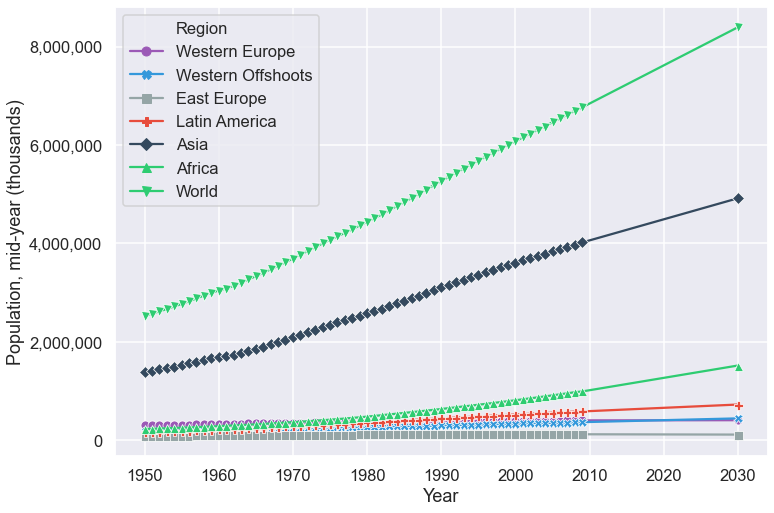

In [20]:
pop['Region'] = pop.Country.astype('category')
pop['pop_'] = pop.pop_.astype(float)
# Select some colors
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#2ecc72"]
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())

sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.reset_orig()
sns.set_context("talk")
# Plot
fig, ax = plt.subplots()
sns.lineplot(x='year', y='pop_', hue='Region', data=pop.loc[(pop.year>=1950)].reset_index(drop=True), alpha=1, palette=sns.color_palette(mycolors), style='Region', dashes=False, markers=True,)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(loc='upper left')
ax.set_xlabel('Year')
ax.set_ylabel('Population, mid-year (thousands)')
plt.savefig(pathgraphs + 'sg1950-2000.pdf', dpi=300, bbox_inches='tight')

In [21]:
from pandas_datareader import data, wb

/opt/anaconda3/envs/GeoPython38env/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [22]:
wbcountries = wb.get_countries()
wbcountries['name'] = wbcountries.name.str.strip()
wbcountries

,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.51670
1,AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.52280
2,AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
3,AGO,AO,Angola,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IBRD,Luanda,13.2420,-8.81155
4,ALB,AL,Albania,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,41.33170
...,...,...,...,...,...,...,...,...,...,...
299,XZN,A5,Sub-Saharan Africa excluding South Africa and ...,Aggregates,,Aggregates,Aggregates,,NaN,NaN
300,YEM,YE,"Yemen, Rep.",Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low income,IDA,Sana'a,44.2075,15.35200
301,ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.74600
302,ZMB,ZM,Zambia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IDA,Lusaka,28.2937,-15.39820


In [23]:
wdipop = wb.download(indicator=['SP.POP.TOTL'], country=wbcountries.iso2c.values)

wdipop

/opt/anaconda3/envs/GeoPython38env/lib/python3.8/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: 1A, 1W, 4E, 6D, 6F, 6L, 6N, 6X, 7E, 8S, A4, A5, A9, B1, B2, B3, B4, B6, B7, B8, C4, C5, C6, C7, C8, C9, D2, D3, D4, D5, D6, D7, D8, D9, EU, F1, F6, JG, L4, L5, L6, L7, M1, M2, N6, O6, OE, R6, S1, S2, S3, S4, T2, T3, T4, T5, T6, T7, V1, V2, V3, V4, XC, XD, XE, XF, XG, XH, XI, XJ, XK, XL, XM, XN, XO, XP, XQ, XT, XU, XY, Z4, Z7, ZB, ZF, ZG, ZJ, ZQ, ZT
  warnings.warn(


SP.POP.TOTL
country     year             
Aruba       2005     100031.0
            2004      98737.0
            2003      97017.0
Afghanistan 2005   25654277.0
            2004   24726684.0
...                       ...
Zambia      2004   11550642.0
            2003   11256743.0
Zimbabwe    2005   12076699.0
            2004   12019912.0
            2003   11982224.0

[792 rows x 1 columns]

In [24]:
wdipop.sort_index()

SP.POP.TOTL
country     year             
Afghanistan 2003   23680871.0
            2004   24726684.0
            2005   25654277.0
Albania     2003    3039616.0
            2004    3026939.0
...                       ...
Zambia      2004   11550642.0
            2005   11856247.0
Zimbabwe    2003   11982224.0
            2004   12019912.0
            2005   12076699.0

[792 rows x 1 columns]

In [25]:
wdipop.rename(columns={'':'Country'}, inplace=True)

wdipop

SP.POP.TOTL
country     year             
Aruba       2005     100031.0
            2004      98737.0
            2003      97017.0
Afghanistan 2005   25654277.0
            2004   24726684.0
...                       ...
Zambia      2004   11550642.0
            2003   11256743.0
Zimbabwe    2005   12076699.0
            2004   12019912.0
            2003   11982224.0

[792 rows x 1 columns]

In [26]:
wdipop2 = wdipop.groupby(['country', 'year']).max()
wdipop2.reset_index(inplace=True)
wdipop2.rename(columns={'Country':'population'}, inplace=True)
wdipop2


,country,year,SP.POP.TOTL
0,Afghanistan,2003,23680871.0
1,Afghanistan,2004,24726684.0
2,Afghanistan,2005,25654277.0
3,Albania,2003,3039616.0
4,Albania,2004,3026939.0
...,...,...,...
787,Zambia,2004,11550642.0
788,Zambia,2005,11856247.0
789,Zimbabwe,2003,11982224.0
790,Zimbabwe,2004,12019912.0


In [27]:
wdipop2.columns = ['Country'] + ['pop2_'+str(col) for col in wdipop2.columns[1:]]
wdipop2

,Country,pop2_year,pop2_SP.POP.TOTL
0,Afghanistan,2003,23680871.0
1,Afghanistan,2004,24726684.0
2,Afghanistan,2005,25654277.0
3,Albania,2003,3039616.0
4,Albania,2004,3026939.0
...,...,...,...
787,Zambia,2004,11550642.0
788,Zambia,2005,11856247.0
789,Zimbabwe,2003,11982224.0
790,Zimbabwe,2004,12019912.0


In [55]:
wdipop2.plot( pd.DataFrame(index=wdipop2.index, columns=list('ABCD')))

ValueError: x must be a label or position

TypeError: '<=' not supported between instances of 'str' and 'int'

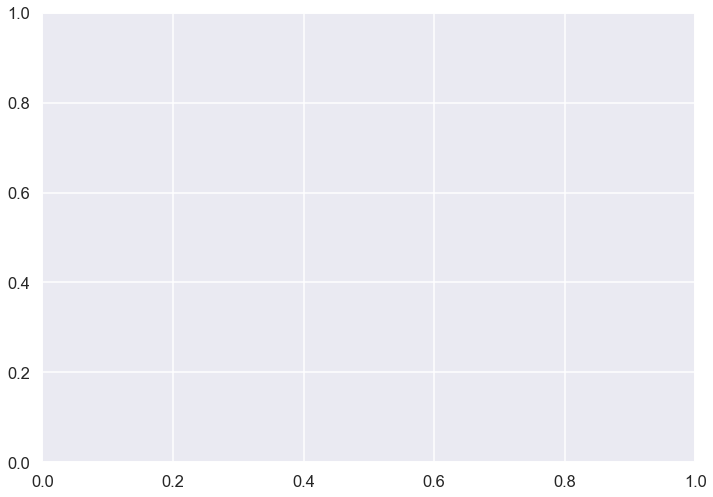

In [66]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("talk")
# Plot
fig, ax = plt.subplots()
sns.lineplot(x='pop2_year', y='pop2_SP.POP.TOTL', hue='country',
             data=wdipop2.loc[
                 
                 (wdipop2.pop2_year<=1900)].reset_index(drop=True),
             alpha=1, style='Country', dashes=False, markers=filled_markers,
             )
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
ax.set_xlabel('Year')
ax.set_ylabel('Industrialization per capita (UK in 1900=100)')
plt.savefig(pathgraphs + 'Industrialization-UK-IND.pdf', dpi=300, bbox_inches='tight')